### Analyzing the Stroop Effect

(1) What is the independent variable? What is the dependent variable?

- Independent - Time
- Dependent   - Congruent & Incongruent

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

From the file we can notice that the time on congruent is less than the incongruent column. That makes sense because the congruent is more instintictive due to the matching of the words and color, that way the brain responds faster. To compute this, we assume the bellow hypothese for this scneario:


$$H_0: \mu_i-\mu_c \leq 0$$
$$H_a: \mu_i-\mu_c > 0$$

Where: 

H0 - The time duration response for Incongruent is always equal or less than the Congruent time.

Ha - The time duration response for Incongruent is always more than the Congruent time.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.shape

(24, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [6]:
df.Congruent.var(),df.Incongruent.var()

(12.669029070652174, 23.011757036231884)

In [7]:
df.Congruent.std(),df.Incongruent.std()

(3.559357957645195, 4.797057122469138)

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

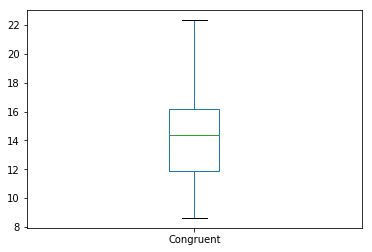

In [8]:
# Project the Age to clear the visualizations and statistics
df['Congruent'].plot(kind='box'); 

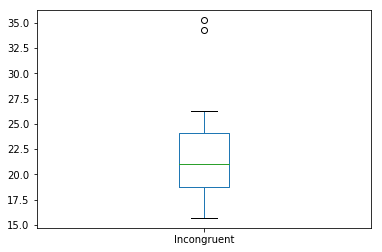

In [9]:
df['Incongruent'].plot(kind='box');

 - Even knowing that the Standard Deviation (std) and Variance (var) on Congruent is less than Incongruent. The times on Incongruent seems to be more centred. 
 - The High Std and Var on Incongruent was due to the outliers.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

- Type I error : An individual with Incongruent time less than Congruent

In this question we will proceed as follows:

Compute the observed difference between the congruent and incongruent group.
Simulate the sampling distribution for the difference in proportions (using bootstraping).
Sampling distribution to simulate the distribution under the null hypothesis, by creating a random normal distribution centered at 0 with the same spread and size.
Compute the p-value by finding the proportion of values in the null distribution that were greater than our observed difference.
Use this p-value to determine the statistical significance of our observed difference.

In [10]:
# get the average time for congruent
congruent_mean = df.Congruent.mean()

# get the average time for incongruent
incongruent_mean = df.Incongruent.mean()

# display average classroom time for each group
congruent_mean, incongruent_mean

(14.051125000000004, 22.01591666666667)

In [11]:
# compute the difference 
obs_diff =  incongruent_mean - congruent_mean

# display observed difference
obs_diff

7.964791666666665

In [12]:
# create sampling distribution of difference in average congruent and incongruent times
# with boostrapping
diffs = []

for _ in range(1000):
    b_samp = df.sample(df.shape[0], replace=True)
    congruent_mean = b_samp.Congruent.mean()
    incongruent_mean = b_samp.Incongruent.mean()
    diffs.append(incongruent_mean - congruent_mean)

In [13]:
# convert to numpy array
diffs = np.array(diffs)

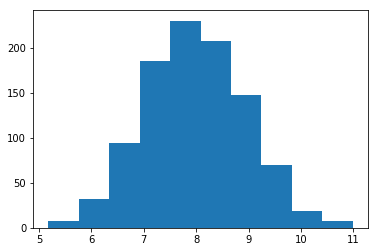

In [14]:
# plot sampling distribution
plt.hist(diffs);

In [15]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

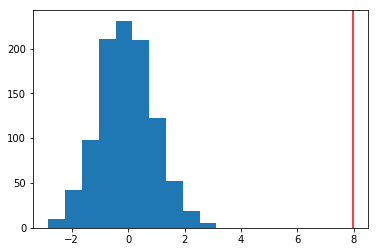

In [16]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff, c='red')

In [17]:
# compute p value
(null_vals > obs_diff).mean()

0.0

- The P value is less than the type I error rate of 0.05 which means we reject the null hypotheses.
- The results were the expecting when we can see that the Congruent time is always less than the Incongruent time.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

There are several theories used to explain the Stroop effect and are commonly known as ‘race models’:

-***Processing speed***: This theory suggests there is a lag in the brain's ability to recognize the color of the word since the brain reads words faster than it recognizes colors.This is based on the idea that word processing is significantly faster than color processing. In a condition where there is a conflict regarding words and colors (e.g., Stroop test), if the task is to report the color, the word information arrives at the decision-making stage before the color information which presents processing confusion. Conversely, if the task is to report the word, because color information lags after word information, a decision can be made ahead of the conflicting information.

-***Selective attention***: The Selective Attention Theory that color recognition as opposed to reading a word, requires more attention, the brain needs to use more attention to recognize a color than to word encoding, so it takes a little longer.The responses lend much to the interference noted in the Stroop task. This may be a result of either an allocation of attention to the responses or to a greater inhibition of distractors that are not appropriate responses.

-***Automaticity**: This theory is the most common theory of the Stroop effect.It suggests that since recognizing colors is not an "automatic process" there is hesitancy to respond; whereas, the brain automatically understands the meaning of words as a result of habitual reading. This idea is based on the premise that automatic reading does not need controlled attention, but still uses enough attentional resources to reduce the amount of attention accessible for color information processing.Stirling (1979) introduced the concept of response automaticity. He demonstrated that changing the responses from colored words to letters that were not part of the colored words increased reaction time while reducing Stroop interference.

-***Parallel distributed processing***: This theory suggests that as the brain analyzes information, different and specific pathways are developed for different tasks. Some pathways, such as reading, are stronger than others, therefore, it is the strength of the pathway and not the speed of the pathway that is important. In addition, automaticity is a function of the strength of each pathway, hence, when two pathways are activated simultaneously in the Stroop effect, interference occurs between the stronger (word reading) path and the weaker (color naming) path, more specifically when the pathway that leads to the response is the weaker pathway.

An alternative or similar task that would result in a similar effect can be ***Numerical Stroop Effect*** demonstrates the relationship between numerical values and physical sizes. When digits are presented visually, they can be physically large or small, irrespective of their actual values. Congruent pairs occur when size and value correspond (e.g., large 5 small 3) while incongruent pairs occur when size and value are incompatible (e.g., large 3 small 5).

### BIOGRAPHY 

- https://en.wikipedia.org/wiki/Stroop_effect#Automaticity
- Pratical Statistic lesson from Udacity Nano Degree Program      